2.2.0-rc4
11493376/11490434 [==============================] - 0s 0us/step
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   

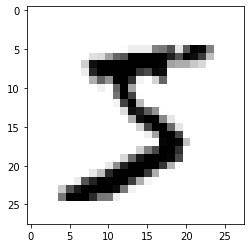

In [ ]:
import tensorflow.keras as keras
import tensorflow as tf
#Print tensorflow version 
print(tf.__version__)
#importing dataset
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()
#Let's look at this actual data:
print(x_train[0])
print(y_train[0])
#we visualize this
import matplotlib.pyplot as plt
plt.imshow(x_train[0],cmap=plt.cm.binary)
plt.show()


In [ ]:
# "normalize" your data
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

In [ ]:
#build model
model = tf.keras.models.Sequential()
#Flatten layer built just for us,
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))


In [ ]:
#"compile" the model.
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history=model.fit(x_train, y_train, epochs=50)

Epoch 1/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2682 - accuracy: 0.9225
Epoch 2/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1104 - accuracy: 0.9662
Epoch 3/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0748 - accuracy: 0.9763
Epoch 4/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0565 - accuracy: 0.9818
Epoch 5/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0417 - accuracy: 0.9868
Epoch 6/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0325 - accuracy: 0.9891
Epoch 7/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0261 - accuracy: 0.9913
Epoch 8/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0216 - accuracy: 0.9926
Epoch 9/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0190 - accuracy: 0.9933
Epoch 10/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.014

In [ ]:
print(history.history)

{'loss': [0.26822346448898315, 0.11044935882091522, 0.07482081651687622, 0.056470613926649094, 0.04166038706898689, 0.03252123296260834, 0.026069337502121925, 0.021570583805441856, 0.018975332379341125, 0.014717292971909046, 0.01407053042203188, 0.012034988962113857, 0.010361405089497566, 0.01109637226909399, 0.010094406083226204, 0.009502633474767208, 0.009721512906253338, 0.006774723529815674, 0.008493107743561268, 0.008238574489951134, 0.007595019415020943, 0.006544454954564571, 0.0059088291600346565, 0.007623237557709217, 0.006740638054907322, 0.005978513974696398, 0.006038408260792494, 0.006034651771187782, 0.005961134564131498, 0.006338327191770077, 0.0053709582425653934, 0.005828273482620716, 0.005697907879948616, 0.005498750135302544, 0.004719658754765987, 0.006144384387880564, 0.006777462549507618, 0.004314708989113569, 0.004688319284468889, 0.005860583391040564, 0.0043859779834747314, 0.005882455967366695, 0.004115547984838486, 0.005673555191606283, 0.00524203572422266, 0.004

50
50


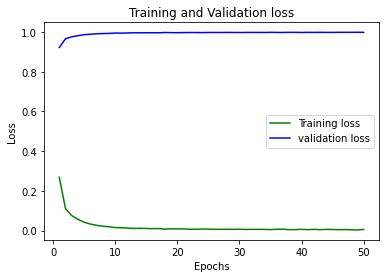

In [ ]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
loss_train = history.history['loss']
print(len(loss_train))
loss_acc = history.history['accuracy']
print(len(loss_acc))
epochs = range(1,51)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_acc, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
#est on out-of-sample data
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss)
print(val_acc)

313/313 [==============================] - 0s 1ms/step - loss: 0.2331 - accuracy: 0.9768
0.23306787014007568
0.9768000245094299


In [ ]:
#save the model
model.save('epic_num_reader.model')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: epic_num_reader.model/assets


In [ ]:


#Load it back:

new_model = tf.keras.models.load_model('epic_num_reader.model')

print(new_model.summary())
predictions = new_model.predict(x_test)
print(predictions)

OSError: ignored

In [ ]:
#get the actual number pretty simply
import numpy as np

print(np.argmax(predictions[5]))

1


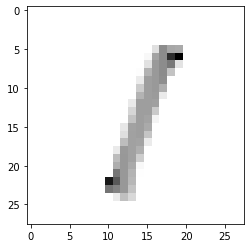

In [ ]:
plt.imshow(x_test[5],cmap=plt.cm.binary)
plt.show()

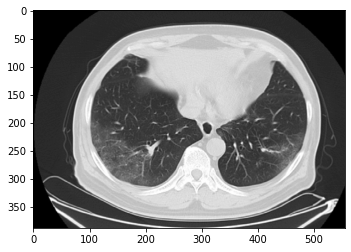

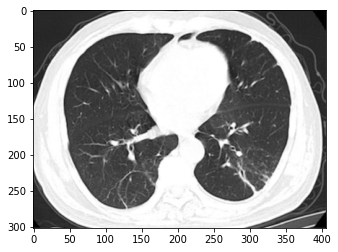

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm

DATADIR="/content/drive/My Drive/covid-19/train"
TEST_DATADIR="/content/drive/My Drive/covid-19/test"
CATEGORIES = ["CT_COVID", "CT_NonCOVID"]

for category in CATEGORIES:  # do covid and noncovid
    path = os.path.join(DATADIR,category)  # create path to covid and noncovid
    for img in os.listdir(path):  # iterate over each image per covid and noncovid
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
        plt.imshow(img_array, cmap='gray')  # graph it
        plt.show()  # display!

        break  # we just want one for now so break
    break  #...and one more!

for category in CATEGORIES:  # do covid and noncovid
    path = os.path.join(TEST_DATADIR,category)  # create path to covid and noncovid
    for img in os.listdir(path):  # iterate over each image per covid and noncovid
        test_data = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
        plt.imshow(test_data, cmap='gray')  # graph it
        plt.show()  # display!

        break  # we just want one for now so break
    break  #...and one more!


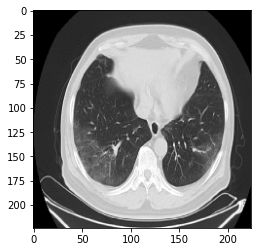

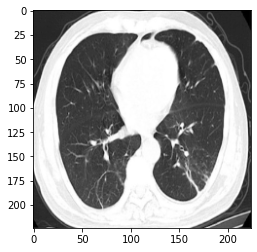

In [ ]:
IMG_SIZE = 224
new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
test_data = cv2.resize(test_data, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()
plt.imshow(test_data, cmap='gray')
plt.show()

In [ ]:
#creating training data

training_data = []
testing_data=[]

def create_training_data():
    for category in CATEGORIES:  # do dogs and cats

        path = os.path.join(DATADIR,category)  # create path to dogs and cats
        class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 0=dog 1=cat

        for img in tqdm(os.listdir(path)):  # iterate over each image per dogs and cats
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                training_data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass
create_training_data()

print(len(training_data))

100%|██████████| 397/397 [08:36<00:00,  1.30s/it]

746


In [ ]:
import random

random.shuffle(training_data)
for sample in training_data[:50]:
    print(sample[1])

1
1
0
1
1
0
1
1
1
1
1
0
1
1
1
0
0
0
1
0
1
1
1
1
0
0
1
0
0
1
1
1
1
0
1
1
1
1
1
0
1
0
0
0
1
0
1
1
0
0


In [ ]:
#Time to make our model!
X = []
y = []

for features,label in training_data:
    X.append(features)
    y.append(label)

print(X[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1))

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

[[[[121]
   [ 92]
   [ 56]
   ...
   [ 52]
   [ 52]
   [ 51]]

  [[ 84]
   [ 54]
   [ 49]
   ...
   [ 52]
   [ 53]
   [ 50]]

  [[ 54]
   [ 45]
   [ 46]
   ...
   [ 54]
   [ 55]
   [ 51]]

  ...

  [[101]
   [ 97]
   [118]
   ...
   [ 54]
   [ 52]
   [ 51]]

  [[ 97]
   [ 98]
   [106]
   ...
   [ 61]
   [ 50]
   [ 37]]

  [[ 72]
   [ 84]
   [ 75]
   ...
   [ 65]
   [ 45]
   [ 39]]]]


In [ ]:
import pickle
pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)

In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)
y=np.array(y)
X = X/255.0
model = Sequential()
model.add(Conv2D(256, (3, 3), input_shape=X.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors

model.add(Dense(64))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.fit(X, y, batch_size=32, epochs=3, validation_split=0.3)

Epoch 1/3
17/17 [==============================] - 343s 20s/step - loss: 7.8769 - accuracy: 0.5498 - val_loss: 0.6421 - val_accuracy: 0.5759
Epoch 2/3
17/17 [==============================] - 342s 20s/step - loss: 0.6002 - accuracy: 0.6533 - val_loss: 0.6751 - val_accuracy: 0.5893
Epoch 3/3
17/17 [==============================] - 340s 20s/step - loss: 0.5037 - accuracy: 0.7471 - val_loss: 0.5736 - val_accuracy: 0.6741


In [ ]:
val_loss, val_acc = model.evaluate(X, y)
print(val_loss)
print(val_acc)

24/24 [==============================] - 118s 5s/step - loss: 0.4533 - accuracy: 0.7681
0.45333364605903625
0.7680965065956116


In [ ]:
#TensorBoard callback
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import TensorBoard
import pickle
import time

NAME = "Covidvsnoncovid"

pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)

X = X/255.0
y=np.array(y)
model = Sequential()

model.add(Conv2D(256, (3, 3), input_shape=X.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(64))

model.add(Dense(1))
model.add(Activation('sigmoid'))

tensorboard = TensorBoard(log_dir="logs/{}".format(NAME))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'],
              )

model.fit(X, y,
          batch_size=32,
          epochs=3,
          validation_split=0.3,
          callbacks=[tensorboard])

Epoch 1/3
17/17 [==============================] - 341s 20s/step - loss: 6.5172 - accuracy: 0.5307 - val_loss: 0.6554 - val_accuracy: 0.5982
Epoch 2/3
17/17 [==============================] - 341s 20s/step - loss: 0.5936 - accuracy: 0.6724 - val_loss: 0.5693 - val_accuracy: 0.6607
Epoch 3/3
17/17 [==============================] - 341s 20s/step - loss: 0.4884 - accuracy: 0.7720 - val_loss: 0.5345 - val_accuracy: 0.7054


In [ ]:
dense_layers = [0, 1, 2]
layer_sizes = [32, 64, 128]
conv_layers = [1, 2, 3]

for dense_layer in dense_layers:
    for layer_size in layer_sizes:
        for conv_layer in conv_layers:
            NAME = "{}-conv-{}-nodes-{}-dense-{}".format(conv_layer, layer_size, dense_layer, int(time.time()))
            print(NAME)

            model = Sequential()

            model.add(Conv2D(layer_size, (3, 3), input_shape=X.shape[1:]))
            model.add(Activation('relu'))
            model.add(MaxPooling2D(pool_size=(2, 2)))

            for l in range(conv_layer-1):
                model.add(Conv2D(layer_size, (3, 3)))
                model.add(Activation('relu'))
                model.add(MaxPooling2D(pool_size=(2, 2)))

            model.add(Flatten())
            for _ in range(dense_layer):
                model.add(Dense(layer_size))
                model.add(Activation('relu'))

            model.add(Dense(1))
            model.add(Activation('sigmoid'))

tensorboard = TensorBoard(log_dir="logs/{}".format(NAME))

model.compile(loss='binary_crossentropy',
                          optimizer='adam',
                          metrics=['accuracy'],
                          )

history=model.fit(X, y,
                      batch_size=32,
                      epochs=4,
                      validation_split=0.3,
                      callbacks=[tensorboard])

1-conv-32-nodes-0-dense-1589214569
2-conv-32-nodes-0-dense-1589214569
3-conv-32-nodes-0-dense-1589214569
1-conv-64-nodes-0-dense-1589214569
2-conv-64-nodes-0-dense-1589214569
3-conv-64-nodes-0-dense-1589214569
1-conv-128-nodes-0-dense-1589214569
2-conv-128-nodes-0-dense-1589214569
3-conv-128-nodes-0-dense-1589214569
1-conv-32-nodes-1-dense-1589214570
2-conv-32-nodes-1-dense-1589214570
3-conv-32-nodes-1-dense-1589214570
1-conv-64-nodes-1-dense-1589214570
2-conv-64-nodes-1-dense-1589214570
3-conv-64-nodes-1-dense-1589214570
1-conv-128-nodes-1-dense-1589214570
2-conv-128-nodes-1-dense-1589214572
3-conv-128-nodes-1-dense-1589214572
1-conv-32-nodes-2-dense-1589214572
2-conv-32-nodes-2-dense-1589214573
3-conv-32-nodes-2-dense-1589214573
1-conv-64-nodes-2-dense-1589214573
2-conv-64-nodes-2-dense-1589214573
3-conv-64-nodes-2-dense-1589214574
1-conv-128-nodes-2-dense-1589214574
2-conv-128-nodes-2-dense-1589214575
3-conv-128-nodes-2-dense-1589214576
Epoch 1/4
17/17 [=============================

In [ ]:
model.save('covid.model')
new_model = tf.keras.models.load_model('covid.model')

print(new_model.summary())


Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: covid.model/assets
Model: "sequential_28"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_55 (Conv2D)           (None, 222, 222, 128)     1280      
_________________________________________________________________
activation_108 (Activation)  (None, 222, 222, 128)     0         
_________________________________________________________________
max_pooling2d_55 (MaxPooling (None, 111, 111, 128)     0         
_________________________________________________________________
conv2d_56 (Conv2D)           (None, 109, 109, 128)     147584    
_________________________________________________________________
activation_109 (Activation)  (None, 109, 109, 128)     0         
_________________________________________________________________
max_pooling2d_56 (MaxPooling (None, 54, 54, 128)  

In [ ]:
#creating testing data
TEST_DATADIR="/content/drive/My Drive/covid-19/test"
CATEGORIES = ["CT_COVID", "CT_NonCOVID"]
IMG_SIZE=224

testing_data=[]

def create_testing_data():
    for category in CATEGORIES:  # do dogs and cats

        path = os.path.join(TEST_DATADIR,category)  # create path to dogs and cats
        class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 0=dog 1=cat

        for img in tqdm(os.listdir(path)):  # iterate over each image per dogs and cats
            try:
                img1_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                new1_array = cv2.resize(img1_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                testing_data.append([new1_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass
create_testing_data()

print(len(training_data))

100%|██████████| 71/71 [00:00<00:00, 225.79it/s]

746


In [ ]:
print(len(testing_data))
model = tf.keras.models.load_model("covid.model")

162


In [ ]:
import random

random.shuffle(testing_data)
for sample in testing_data[:10]:
    print(sample[1])


0
1
0
0
1
1
1
0
1
0


In [ ]:
X_test = []
y_test = []

for features,label in testing_data:
    X_test.append(features)
    y_test.append(label)

print(X_test[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1))

X_test = np.array(X_test).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

[[[[ 26]
   [ 23]
   [ 37]
   ...
   [  0]
   [  0]
   [  0]]

  [[ 32]
   [ 26]
   [ 40]
   ...
   [  2]
   [  1]
   [  1]]

  [[ 24]
   [ 24]
   [ 28]
   ...
   [  0]
   [  1]
   [  1]]

  ...

  [[255]
   [254]
   [252]
   ...
   [ 23]
   [ 68]
   [ 47]]

  [[254]
   [253]
   [253]
   ...
   [ 29]
   [ 21]
   [ 29]]

  [[136]
   [224]
   [253]
   ...
   [ 23]
   [ 27]
   [ 69]]]]


In [ ]:
pickle_out = open("X_test.pickle","wb")
pickle.dump(X_test, pickle_out)
pickle_out.close()

pickle_out = open("y_test.pickle","wb")
pickle.dump(y_test, pickle_out)
pickle_out.close()

pickle_in = open("X_test.pickle","rb")
X_test = pickle.load(pickle_in)

pickle_in = open("y_test.pickle","rb")
y_test = pickle.load(pickle_in)

y_test=np.array(y_test)
X_test = X_test/255.0

In [ ]:
print((y_test))

[0 1 0 0 1 1 1 0 1 0 1 1 0 0 1 1 0 1 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 0 1 0 0
 0 1 0 1 1 0 0 1 1 0 1 1 1 0 1 0 1 1 1 0 0 1 0 0 1 0 0 0 0 0 1 0 1 0 0 1 1
 1 1 1 0 0 0 0 1 1 0 1 0 1 0 0 1 1 1 0 0 1 0 0 0 0 1 0 1 0 0 1 1 0 0 1 1 1
 0 0 1 1 0 1 0 0 1 0 1 0 1 1 0 1 1 1 0 0 0 1 0 0 1 1 1 0 0 0 0 0 1 0 0 0 0
 0 1 0 0 1 0 0 1 1 0 0 0 0 0]


In [ ]:
prediction = model.predict(X_test)
print(prediction)  # will be a list in a list.
print(CATEGORIES[all(prediction)])

[[0.01536348]
 [0.29452798]
 [0.71881986]
 [0.20570329]
 [1.        ]
 [0.7644481 ]
 [0.48374075]
 [0.17440787]
 [0.5008572 ]
 [0.38573468]
 [0.615242  ]
 [0.46776587]
 [0.15133637]
 [0.02278912]
 [0.9447857 ]
 [0.5872745 ]
 [0.26669577]
 [0.57254857]
 [0.39510995]
 [0.71881986]
 [0.27539912]
 [0.3619445 ]
 [0.00985578]
 [0.67209333]
 [0.01028377]
 [0.99997455]
 [0.27243388]
 [0.3786709 ]
 [0.17441154]
 [0.32542613]
 [0.5682446 ]
 [0.3762974 ]
 [0.04933348]
 [0.20499647]
 [0.55786103]
 [0.45368454]
 [0.07224044]
 [0.0093081 ]
 [0.53808105]
 [0.12777776]
 [0.50590014]
 [0.49991074]
 [0.16616598]
 [0.23038414]
 [0.56352264]
 [0.30702454]
 [0.10870484]
 [0.4405197 ]
 [0.26959234]
 [0.32693297]
 [0.15106004]
 [0.99981916]
 [0.185117  ]
 [0.45848578]
 [0.63979155]
 [0.74606776]
 [0.16616598]
 [0.00378236]
 [0.6370865 ]
 [0.05288363]
 [0.0354715 ]
 [0.48396054]
 [0.52459514]
 [0.00177485]
 [0.05494738]
 [0.17764658]
 [0.37225226]
 [0.5234376 ]
 [0.5125845 ]
 [0.45472077]
 [0.40323126]
 [0.32

In [ ]:
history = model.fit(X, y, epochs=50, batch_size=1, validation_data=(X_test, y_test))
#history=model.fit(X, y, batch_size=1, epochs=50, validation_split=0.3, callbacks=[tensorboard])

Epoch 1/50
522/522 [==============================] - 178s 341ms/step - loss: 0.5732 - accuracy: 0.7586 - val_loss: 0.5023 - val_accuracy: 0.7411
Epoch 2/50
522/522 [==============================] - 179s 343ms/step - loss: 0.4612 - accuracy: 0.7874 - val_loss: 0.5044 - val_accuracy: 0.7009
Epoch 3/50
522/522 [==============================] - 178s 341ms/step - loss: 0.3100 - accuracy: 0.8525 - val_loss: 0.6196 - val_accuracy: 0.7054
Epoch 4/50
522/522 [==============================] - 177s 339ms/step - loss: 0.2355 - accuracy: 0.8946 - val_loss: 0.7399 - val_accuracy: 0.7098
Epoch 5/50
522/522 [==============================] - 177s 340ms/step - loss: 0.2121 - accuracy: 0.9387 - val_loss: 0.5698 - val_accuracy: 0.7589
Epoch 6/50
522/522 [==============================] - 177s 339ms/step - loss: 0.1106 - accuracy: 0.9636 - val_loss: 1.3129 - val_accuracy: 0.7277
Epoch 7/50
522/522 [==============================] - 177s 339ms/step - loss: 0.1504 - accuracy: 0.9502 - val_loss: 1.0163 -

In [ ]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1,101)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
print(history.history)

{'loss': [1.527673363685608, 0.3026033043861389, 0.637980580329895, 0.28757113218307495, 0.19922994077205658, 0.16255564987659454, 0.20535916090011597, 0.1279604583978653, 0.6869879364967346, 0.13622495532035828, 0.2968329191207886, 0.34104669094085693, 0.283975750207901, 0.32979869842529297, 0.2030937224626541, 0.22343860566616058, 0.10739924013614655, 0.28056609630584717, 0.11245863139629364, 0.07695330679416656, 0.1304316371679306, 0.16828347742557526, 0.08638056367635727, 0.06966008245944977, 0.05987716093659401, 0.018298780545592308, 0.781561017036438, 0.10122966021299362, 0.053303055465221405, 0.10717346519231796, 0.004304154776036739, 0.0001600797986611724, 3.606370955822058e-05, 1.4250360436562914e-05], 'accuracy': [0.9683098793029785, 0.9753521084785461, 0.9647887349128723, 0.9753521084785461, 0.9753521084785461, 0.9683098793029785, 0.9788732528686523, 0.9718309640884399, 0.9683098793029785, 0.9823943376541138, 0.9718309640884399, 0.9718309640884399, 0.9718309640884399, 0.9753

In [ ]:
acc_train = history.history['accuracy']
acc_val = history.history['val_accuracy']
epochs = range(1,101)
plt.plot(epochs, acc_train, 'g', label='Training Accuracy')
plt.plot(epochs, acc_val, 'b', label='validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()